Project name : [ noshowappointments-kagglev2-may-2016 ]

Introduction

 This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

Data set description

we have a csv file which contains the data


Questions for analyzing

We will not put any hypotheses .But,we will try to find out the effect of Age , Neigbourhood , Scholarship , Hypertension , Diabetes , Alcoholism ,Sms_receiving  and Gender on showing up for scheduled appointment .

This report will try to answer the following questions:

1 – Does the Age affect the patient’s attending?

2 – Does Neigbourhood affect the patient’s attending?

3- Does Scholarship affect the patient’s attending?

4 - Does Hypertension affect the patient’s attending?

5 - Does the Diabetes affect the patient’s attending?

6 - Does the Alcoholism affect the patient’s attending?

7 - Does the SMS_receiving affect the patient’s attending?

8 - Does the Gender affect the patient’s attending?

9 – What is the percentage of attending for each kind of gender?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Data wrangling

Here , data will be loaded and checked in order to clean data set


General properties 

loading data

printing some data

checking data and looking for errors or missing and outlier data 


In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# exploring the data shape
df.shape


(110527, 14)

In [4]:
# checking for duplications
df.duplicated ().sum()


0

In [5]:
# checking for unique values
df ['PatientId'].nunique()


61744

In [6]:
# checking for duplicated  patient Ids
df ['PatientId'] .duplicated() . sum()


48783

In [7]:
# looking for missing values
df.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# some important statistics about data 
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# knowing the row index contains values  for age less than zero
df[df['Age']==df['Age'].min()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
#removing the values for age less than zero
df.drop (index =99832 , inplace = True)


In [11]:
# re-looking at the data after removing the row that contains age less than zero 
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172538e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
# correcting column names
df.rename(columns = {'No-show' : 'No_show' ,'Hipertension':'Hypertension', 'Handcap': 'Handicap'} ,  inplace = True)
df.head ()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# removing unnecessary columns of data
df.drop(['PatientId' , 'AppointmentID' , 'ScheduledDay' , 'AppointmentDay'] , axis = 1 , inplace = True)
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Data wrangling summary

1 – gathering data from csv file and exploring it through the general properties shown previously

2 – showing data dimensions 

3 – exploring for duplication and unique values or missing data

4 – exploring some data statistics 

5 – removing unnecessary columns 


** Analyzing Data**

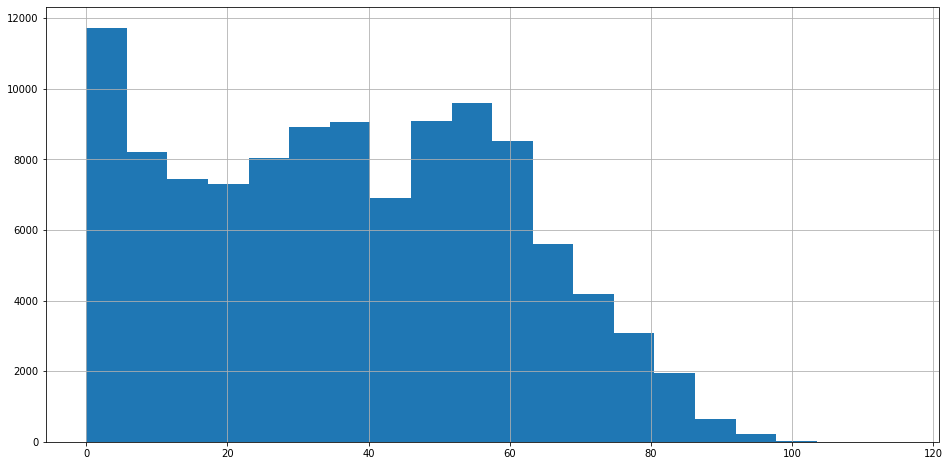

In [19]:
df['Age']. hist ( figsize = (16,8),bins=20)

Testing the factors and their effect on the attendance rate  

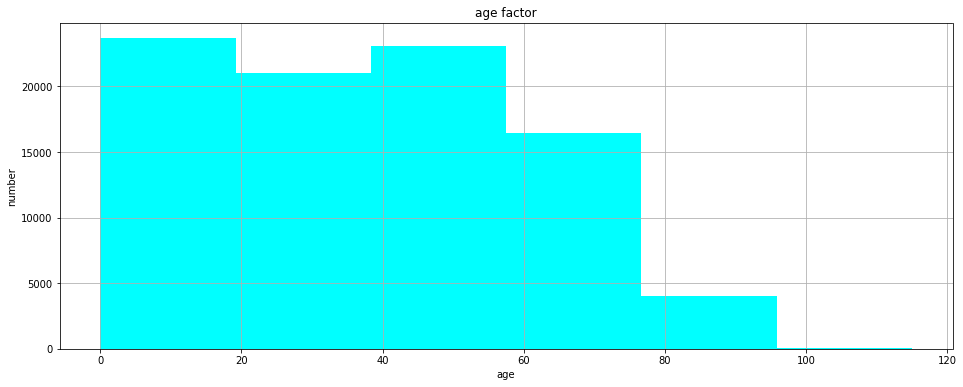

In [37]:
# 1 – Does the age affect the patient’s attending?

def patient_show (df,col_name,attended):
    attended = df.No_show == 'No'
    plt . figure( figsize = [16 , 6 ])    
    df [ col_name ][ attended ] . hist ( alpha = 1 , bins = 6 , color = 'cyan')
    plt . title ('age factor')
    plt . xlabel ('age')
    plt . ylabel ( 'number') ;  
patient_show (df,'Age','attended')

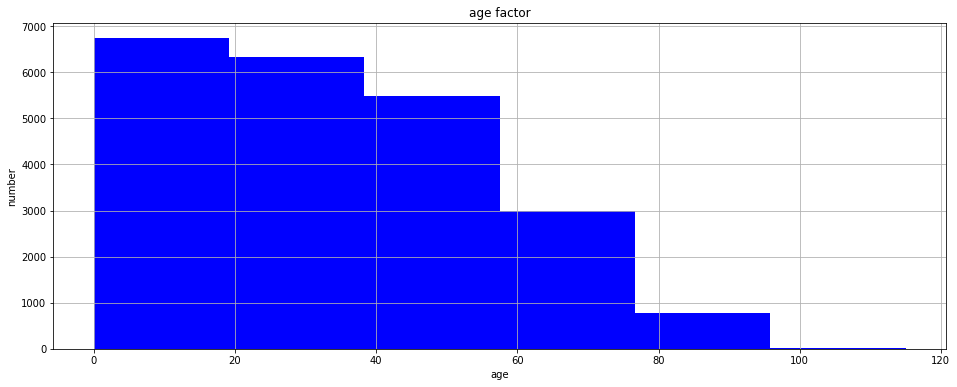

In [41]:
def patient_noshow (df,col_name,absent):
    absent = df.No_show == 'Yes'
    plt . figure( figsize = [16 , 6 ])    
    df [ col_name ][ absent ] . hist ( alpha = 1 , bins = 6 , color = 'blue')
    plt . title ('age factor')
    plt . xlabel ('age')
    plt . ylabel ( 'number') ;  
patient_noshow (df,'Age','absent')

The diagram shows that the attendance of younger people is nearly similar to  older people while the number of patients who attended on time is bigger than those who didn't.

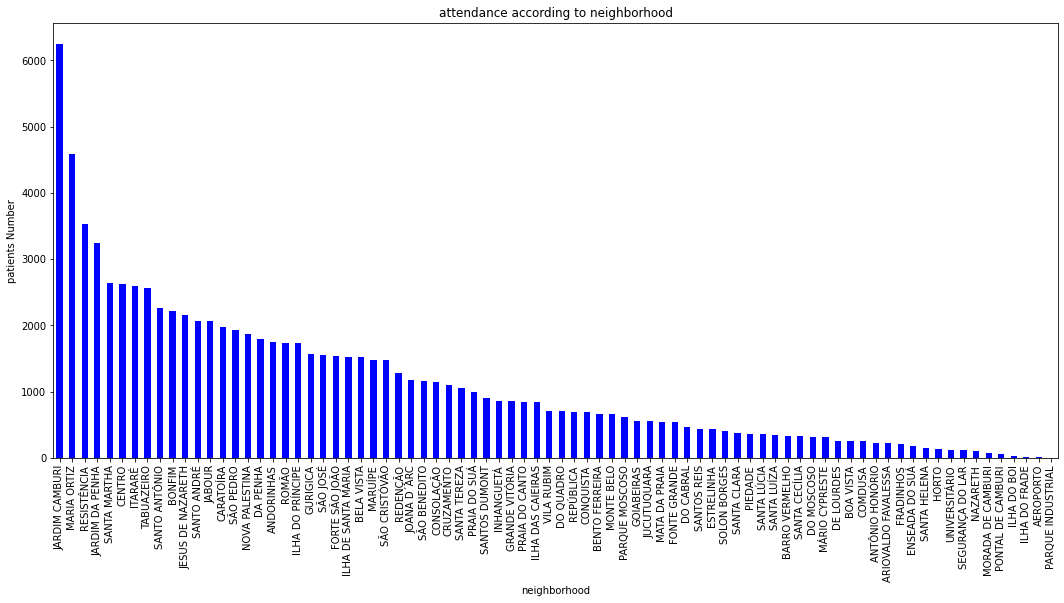

In [33]:
#2 – Does the Neighbourhood affect the patient’s attending?
def patient_show (df,col_name,attended):
    attended = df.No_show == 'No'
    plt.figure(figsize=[18,8])
    df.Neighbourhood[attended].value_counts().plot(kind='bar',color='blue')    
    plt . title ('attendance according to neighborhood')
    plt . xlabel ('neighborhood')
    plt . ylabel ('patients Number') ;    
patient_show (df,'Neighbourhood','attended')

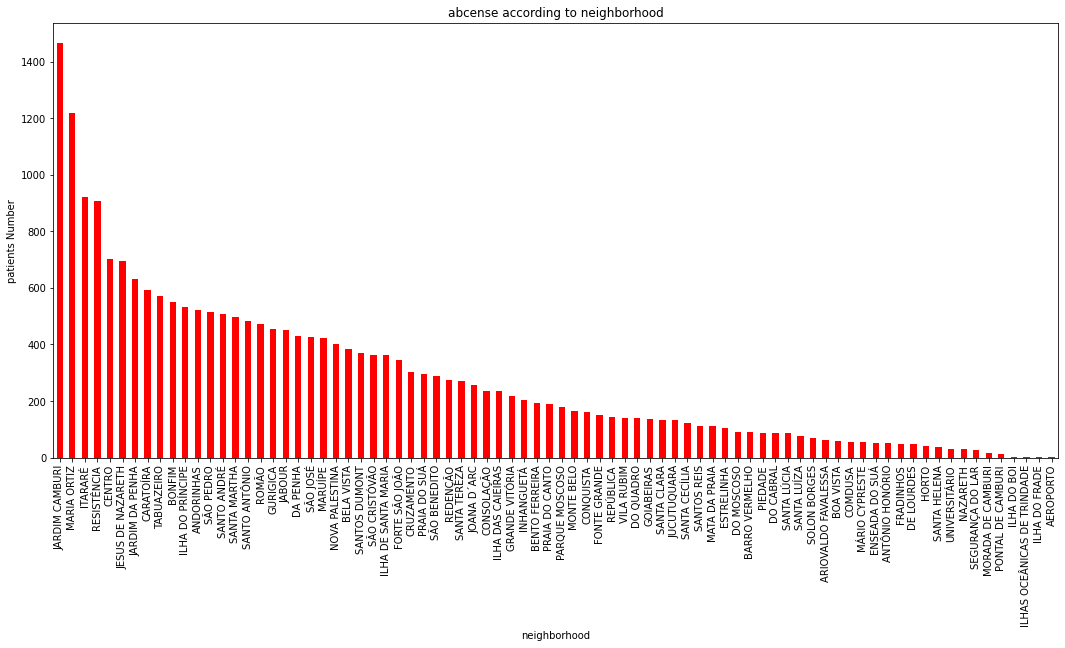

In [42]:
def patient_noshow (df,col_name,absent):
    absent = df.No_show == 'Yes'
    plt.figure(figsize=[18,8])
    df.Neighbourhood[absent].value_counts().plot(kind='bar',color='red')    
    plt . title ('abcense according to neighborhood')
    plt . xlabel ('neighborhood')
    plt . ylabel ('patients Number') ;    
patient_noshow (df,'Neighbourhood','absent')

It seems that there is a strong relation between Neighborhood and attending but I think it would be better if the distance given in kilometers.

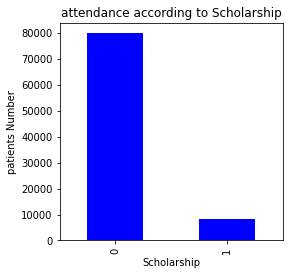

In [46]:
#3 – Does the Scholarship affect the patient’s attending?

def patient_show (df,col_name,attended):
    attended = df.No_show == 'No'
    plt.figure(figsize=[4,4])
    df.Scholarship[attended].value_counts().plot(kind='bar',color='blue')    
    plt . title ('attendance according to Scholarship')
    plt . xlabel ('Scholarship')
    plt . ylabel ('patients Number') ;    
patient_show (df,'Scholarship','attended')

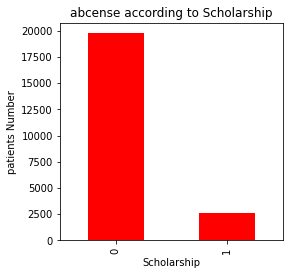

In [48]:
def patient_noshow (df,col_name,absent):
    absent = df.No_show == 'Yes'
    plt.figure(figsize=[4,4])
    df.Scholarship[absent].value_counts().plot(kind='bar',color='red')    
    plt . title ('abcense according to Scholarship')
    plt . xlabel ('Scholarship')
    plt . ylabel ('patients Number') ;    
patient_noshow (df,'Scholarship','absent')

The diagram shows that the attendance of patients who don't have scholarship is more than those who have scholarship.
This means there is no relation between Scholarship and patient attending

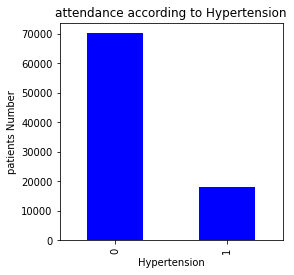

In [49]:
#4 – Does the Hypertension affect the patient’s attending?

def patient_show (df,col_name,attended):
    attended = df.No_show == 'No'
    plt.figure(figsize=[4,4])
    df.Hypertension[attended].value_counts().plot(kind='bar',color='blue')    
    plt . title ('attendance according to Hypertension')
    plt . xlabel ('Hypertension')
    plt . ylabel ('patients Number') ;    
patient_show (df,'Hypertension','attended')

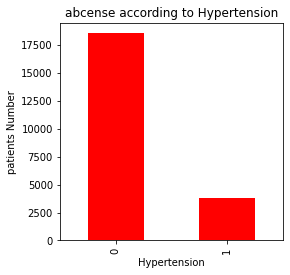

In [50]:
def patient_noshow (df,col_name,absent):
    absent = df.No_show == 'Yes'
    plt.figure(figsize=[4,4])
    df.Hypertension[absent].value_counts().plot(kind='bar',color='red')    
    plt . title ('abcense according to Hypertension')
    plt . xlabel ('Hypertension')
    plt . ylabel ('patients Number') ;    
patient_noshow (df,'Hypertension','absent')

The diagram shows that the patients who suffer from Hypertension are fewer than those who don't suffer. 

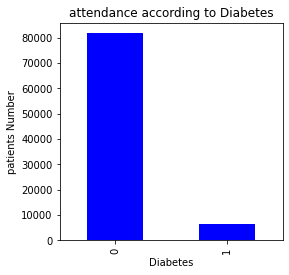

In [52]:
#5 – Does the Diabetes affect the patient’s attending?

def patient_show (df,col_name,attended):
    attended = df.No_show == 'No'
    plt.figure(figsize=[4,4])
    df.Diabetes[attended].value_counts().plot(kind='bar',color='blue')    
    plt . title ('attendance according to Diabetes')
    plt . xlabel ('Diabetes')
    plt . ylabel ('patients Number') ;    
patient_show (df,'Diabetes','attended')

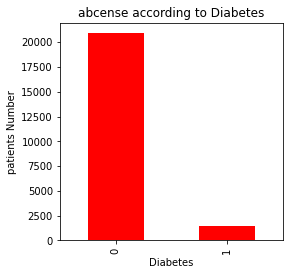

In [54]:
def patient_noshow (df,col_name,absent):
    absent = df.No_show == 'Yes'
    plt.figure(figsize=[4,4])
    df.Diabetes[absent].value_counts().plot(kind='bar',color='red')    
    plt . title ('abcense according to Diabetes')
    plt . xlabel ('Diabetes')
    plt . ylabel ('patients Number') ;    
patient_noshow (df,'Diabetes','absent')

The diagram shows that the patients who suffer from Diabetes are fewer than those who don't suffer.


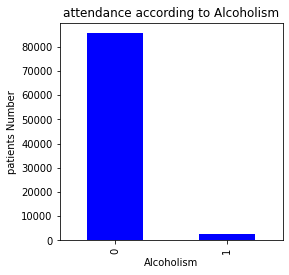

In [55]:
#6 – Does the Alcoholism affect the patient’s attending?

def patient_show (df,col_name,attended):
    attended = df.No_show == 'No'
    plt.figure(figsize=[4,4])
    df.Alcoholism[attended].value_counts().plot(kind='bar',color='blue')    
    plt . title ('attendance according to Alcoholism')
    plt . xlabel ('Alcoholism')
    plt . ylabel ('patients Number') ;    
patient_show (df,'Alcoholism','attended')

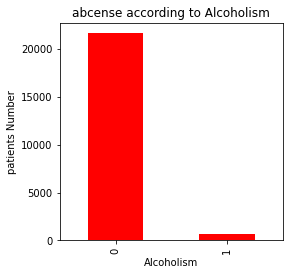

In [56]:
def patient_noshow (df,col_name,absent):
    absent = df.No_show == 'Yes'
    plt.figure(figsize=[4,4])
    df.Alcoholism[absent].value_counts().plot(kind='bar',color='red')    
    plt . title ('abcense according to Alcoholism')
    plt . xlabel ('Alcoholism')
    plt . ylabel ('patients Number') ;    
patient_noshow (df,'Alcoholism','absent')

The diagram shows that the patients who drink alcohol are fewer than those who don't drink. 

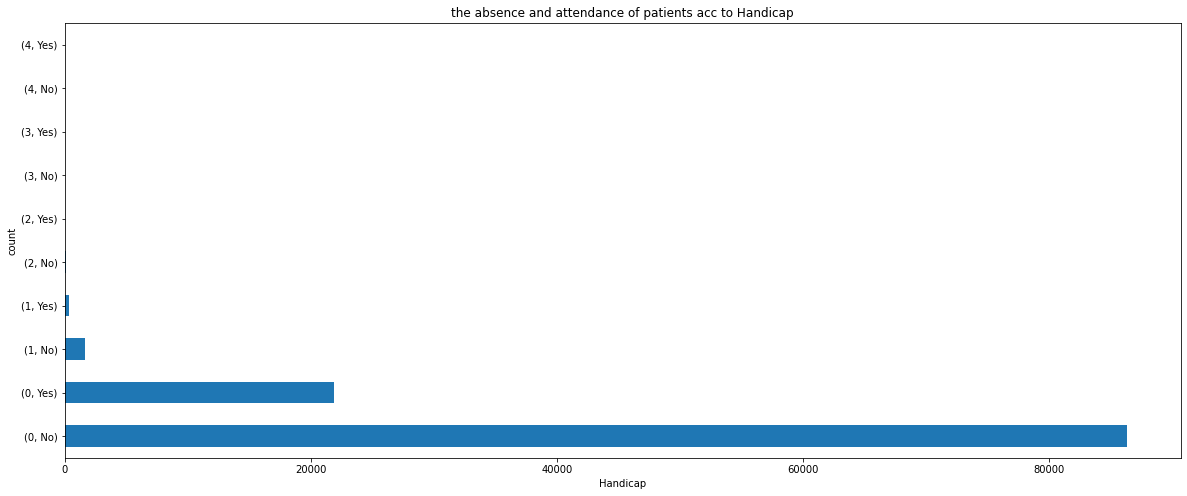

In [ ]:
#6 – Does the Handicap affect the patient’s attending?

df.groupby(['Handicap','No_show'])['No_show'].count().plot(kind = 'barh',figsize=[20,8])
plt.title('the absence and attendance of patients acc to Handicap')
plt.xlabel('Handicap')
plt.ylabel('count');

There is no clear relation between patient attendance and handicap.

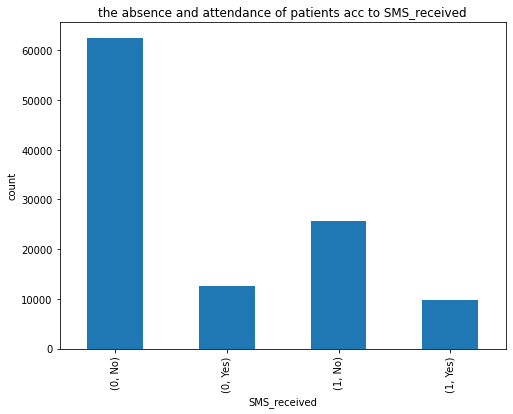

In [ ]:
#7 – Does the SMS_received affect the patient’s attending?

df.groupby(['SMS_received','No_show'])['No_show'].count().plot(kind = 'bar',figsize=[8,6])
plt.title('the absence and attendance of patients acc to SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('count');

There is no clear relation between patient attendance and SMS_receiving.

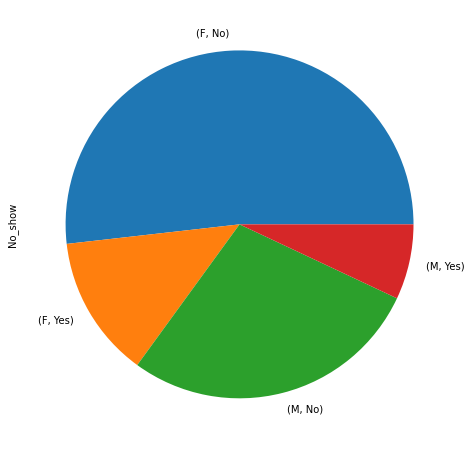

In [ ]:
#8 – Does the Gender affect the patient’s attending?
df.groupby(['Gender','No_show'])['No_show'].count().plot(kind = 'pie',figsize=[8,8])

The diagram shows gender has a great effect on attendance.


Conclusion

1 - Neighborhood,Age,Gender have a great effect on attending.

2 - There is a weak relation between hyrtension and attending .

3 - There is no clear relation between attending and diabetes,Alcoholism and Handicap.


Limitations

1-The responsible agency of SMS service should be revised.

2-The neighborhood distance should be given in kilometers.
